# <center> House Price Predictions by Deep Learning with TensorFlow <center>

# 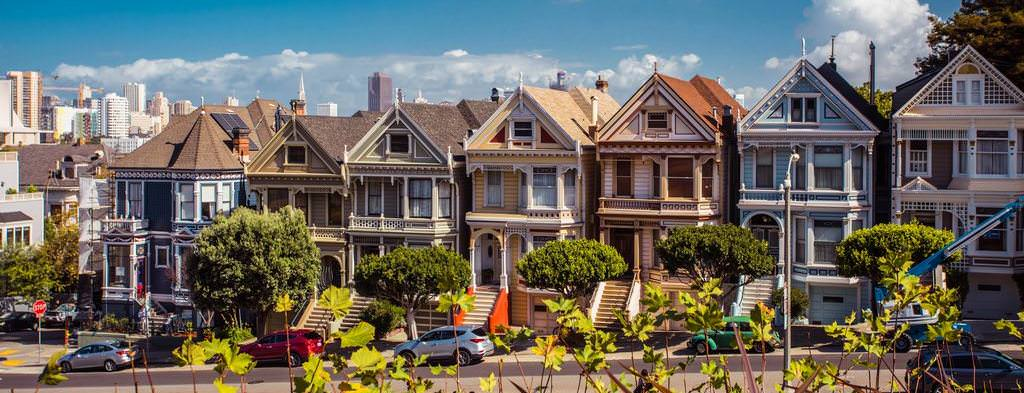

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Loading-Dataset" data-toc-modified-id="Loading-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading Dataset</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#EDA-and-Visualization" data-toc-modified-id="EDA-and-Visualization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EDA and Visualization</a></span></li><li><span><a href="#Predicting-the-House-Price-by-TensorFlow" data-toc-modified-id="Predicting-the-House-Price-by-TensorFlow-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Predicting the House Price by TensorFlow</a></span><ul class="toc-item"><li><span><a href="#Splitting-the-Data" data-toc-modified-id="Splitting-the-Data-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Splitting the Data</a></span></li><li><span><a href="#Scaling" data-toc-modified-id="Scaling-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Scaling</a></span></li><li><span><a href="#Model-with-No-Early-Stopping-and-No-Droupout-Layer" data-toc-modified-id="Model-with-No-Early-Stopping-and-No-Droupout-Layer-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Model with No Early Stopping and No Droupout Layer</a></span><ul class="toc-item"><li><span><a href="#Creating-the-Model" data-toc-modified-id="Creating-the-Model-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Creating the Model</a></span></li><li><span><a href="#Training-the-Model" data-toc-modified-id="Training-the-Model-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Training the Model</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Training-Loss-per-Epoch" data-toc-modified-id="Training-Loss-per-Epoch-6.3.3.1"><span class="toc-item-num">6.3.3.1&nbsp;&nbsp;</span>Training Loss per Epoch</a></span></li><li><span><a href="#Evaluation-on--the-Test-Dataset" data-toc-modified-id="Evaluation-on--the-Test-Dataset-6.3.3.2"><span class="toc-item-num">6.3.3.2&nbsp;&nbsp;</span>Evaluation on  the Test Dataset</a></span></li><li><span><a href="#Evaluation-on--train-dataset" data-toc-modified-id="Evaluation-on--train-dataset-6.3.3.3"><span class="toc-item-num">6.3.3.3&nbsp;&nbsp;</span>Evaluation on  train dataset</a></span></li><li><span><a href="#Further-Evaluations-(MAE,-MSE,-RMSE)" data-toc-modified-id="Further-Evaluations-(MAE,-MSE,-RMSE)-6.3.3.4"><span class="toc-item-num">6.3.3.4&nbsp;&nbsp;</span>Further Evaluations (MAE, MSE, RMSE)</a></span></li></ul></li></ul></li><li><span><a href="#Prediction-on-Brand-New-Data" data-toc-modified-id="Prediction-on-Brand-New-Data-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Prediction on Brand New Data</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Introduction

In this Notebook, we will work on a dataset that contains house sale prices for King County in Seattle. It includes homes sold between May 2014 and May 2015. It is a great dataset for evaluating regression models.

The purpose of this Kernel is to develop a neural network that is capable of accurately predicting the house prices, given several measurements. For this purpose, first we will analyze this dataset and then build a deep learning regression model with  without early stopping and droupout layers and evaluate the results. Finally, we will implement this model on a brand new data and predict the house prices.

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics

## Loading Dataset

In [ ]:
df=pd.read_csv('../input/housesalesprediction/kc_house_data.csv')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

The dataset is pretty clean and does not need Data Cleaning.

In [ ]:
df.describe().transpose()

## Feature Engineering

First we drop the id column.

In [ ]:
df.drop(['id'],axis=1, inplace=True)

Then we add the year and month columns to the dataframe.

In [ ]:
df['date']=pd.to_datetime(df['date'])

In [ ]:
df['year']=df['date'].apply(lambda x: x.year)
df['month']=df['date'].apply(lambda x: x.month)

In [ ]:
df.drop(['date'], axis=1,inplace=True)

Now we convert the zipcode to a categorical column.

In [ ]:
df['zipcode'].nunique()

In [ ]:
le=LabelEncoder()

In [ ]:
le.fit(df['zipcode'])

In [ ]:
df['zipcode']=le.transform(df['zipcode'])

We also convert the yr_renovated column to a categorical column.

In [ ]:
df['yr_renovated'].value_counts()

We see that most of the houses were not renovated. So instead of this column, we add a categorical column that shows whether the house was renovated or not.

In [ ]:
df['renovated']=df['yr_renovated'].apply(lambda x: 0 if x==0 else 1)

In [ ]:
df.drop(['yr_renovated'], axis=1,inplace=True)

## EDA and Visualization

Here we visualize the price of the houses.

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(x='price', bins=100, data=df, edgecolor='w',color='black')
plt.title('Price Distribution', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

We can see that most of the houses have a price between 0 to 1.5 million dollar.

Now we want to count the Number of Bedrooms for all houses in the dataset.

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='bedrooms',data=df)
plt.title('Number of Bedrooms', fontsize=15)
plt.xlabel('Bedrooms', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

A vast majority of these houses have 2 to 5 bedrooms.

Now we plot the correlation between price and other features.

In [ ]:
cor=df.corr()['price'].sort_values(ascending=False).drop(['price', 'zipcode'])

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(x=list(cor.index), height=list(cor.values), color='teal')
plt.xticks(rotation=90)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title('Correlation of Features with Price', fontsize=15)
plt.show()

We can see that the square feet of living space has a high correlation with the price of the house.

Now we explore the scatter plots of price with features that have a high correlation with it.

In [ ]:
new=sns.PairGrid(df,x_vars=['sqft_living', 'sqft_above'], y_vars=['price'],height=5,aspect=1)
new.map(plt.scatter)
plt.show()

In [ ]:
plt.figure(figsize=(22,6))
plt.subplot(1,2,1)
sns.boxplot(x='bedrooms', y='price', data=df)
plt.subplot(1,2,2)
sns.boxplot(x='bathrooms', y='price', data=df)
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot( x='lat',y='price', data=df)
plt.subplot(1,2,2)
sns.scatterplot( x='long',y='price', data=df)
plt.ylabel('')
plt.show()

It seems in some geographical lattitude and longitudes, the prices of houses are higher.

Now we explore the geographical properties of the houses.

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(x='long',y='lat',data=df, c='price',cmap='RdYlGn')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Lattitude', fontsize=12)
plt.title('The Geographical Properties of the Houses', fontsize=15)
plt.show()

We see the lattitude versus longitude is similar to the map of Seattle, and also the color gradient is not visible enough due to the outliers.

We will drop the top %1 of houses with high prices and create a new dataframe.`m

In [ ]:
df.shape

In [ ]:
21597*0.01

In [ ]:
df_new=df.sort_values(by='price', ascending=False).iloc[216:]

In [ ]:
df_new.head()

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(x='long',y='lat',data=df_new, c='price',cmap='RdYlGn')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Lattitude', fontsize=12)
plt.title('The Geographical Properties of the Houses with Lower Prices', fontsize=15)
plt.show()

We can see at the edge of water, the price of houses is higher.

Here we analyze the distribution of prices versus waterfront. 

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='waterfront', y='price',data=df, palette='winter')
plt.xlabel('Waterfront', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('The Distribution of Prices Versus Waterfront', fontsize=15)
plt.show()

We see that if the houses are located at the waterfront, their prices are higher.

Here we study the variation of price versus month and year.

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='month',y='price',data=df)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('The Variation of House Prices Versus Month', fontsize=15)
plt.show()

From the above plot, it is hard to interpret the data, so we study the mean prices in each month.

In [ ]:
plt.figure(figsize=(8,6))
df.groupby('month').mean()['price'].plot(color='m')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Mean Price', fontsize=12)
plt.title('The Variation of Mean Prices Versus Month', fontsize=15)
plt.show()

According to the above figure, the mean price in the 4th month is maximum.

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='year',y='price',data=df, palette='cubehelix_r')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('The Variation of House Prices Versus Year', fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
df.groupby('year').mean()['price'].plot(color='c')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Mean Price', fontsize=12)
plt.title('The Variation of Mean Prices Versus Year', fontsize=15)
plt.show()

It can be observed that the mean price increases between 2014 and 2015.

## Predicting the House Price by TensorFlow

### Splitting the Data

In [ ]:
X=df.drop(['price'],axis=1).values
y=df['price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Scaling

In [ ]:
mms=MinMaxScaler()

In [ ]:
mms.fit(X_train)

In [ ]:
X_train=mms.transform(X_train)

In [ ]:
X_test=mms.transform(X_test)

### Model with No Early Stopping and No Droupout Layer

#### Creating the Model

In [ ]:
X_test.shape

In [ ]:
model=Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

#### Training the Model

In [ ]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), batch_size=128, epochs=400 )

#### Evaluation

##### Training Loss per Epoch

In [ ]:
loss_df=pd.DataFrame(model.history.history)

In [ ]:
loss_df.plot(figsize=(7,6), colormap='RdBu_r')
plt.title('Training Loss Per Epoch', fontsize=15)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.show()

##### Evaluation on  the Test Dataset

In [ ]:
model.evaluate(X_test,y_test,verbose=0)

##### Evaluation on  train dataset

In [ ]:
model.evaluate(X_train,y_train,verbose=0)

##### Further Evaluations (MAE, MSE, RMSE)

In [ ]:
prediction=model.predict(X_test)

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(y_test,y_test, color='b')
plt.scatter(y_test,prediction,color='r')
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.title('Predicted Versus Actual Prices', fontsize=15)
plt.show()

In [ ]:
print('MAE= ', metrics.mean_absolute_error(y_test,prediction))
print('MSE= ', metrics.mean_squared_error(y_test,prediction))
print('RMSE= ', np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R2 Score= ', metrics.r2_score(y_test,prediction))

In [ ]:
df['price'].mean()

In [ ]:
metrics.mean_absolute_error(y_test,prediction)/df['price'].mean()

We see that the mean of price is about $540,000, and the mean absolute percentage error (MAPE) is 18.6%, meaning that our predicted price values are around 18.6% off the mean price values. 

### Prediction on Brand New Data

In [ ]:
new=df.drop(['price'],axis=1).iloc[0]

In [ ]:
new.values

In [ ]:
X_train.shape

In [ ]:
new=new.values.reshape(-1,20)

In [ ]:
new

In [ ]:
new=mms.transform(new)

In [ ]:
model.predict(new)

In [ ]:
df['price'].iloc[0]

The true price is 221900 dollar and the model predicted it 284029.44 dollar, which is reasonable.

## Conclusion

Here we worked on house sale prices dataset and implemented deep learning to predict the house prices.

- We developed a neural network that was capable of accurately predicting the house prices and built a deep learning regression model without early stopping and dropout layers. 

- The obtained RMSE and R2 Score were 161004.45 and 0.815, respectively.